In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
image=cv2.imread('Lenna.png')

In [ ]:
def plothist(image,name):
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.hist(image.flatten(), bins=256, range=(0, 256), color='r', density=True)
  plt.title(name)
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Frequency")
  plt.xlim([0, 256])

In [ ]:
def gray_scale(image):
    h, w, d = image.shape
    DI = np.empty((h, w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            DI[i, j] = (int(image[i, j, 0]) +
                        int(image[i, j, 1]) +
                        int(image[i, j, 2])) // 3
    return DI

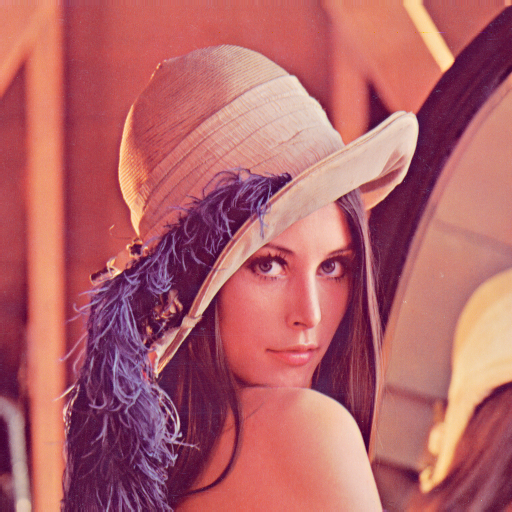

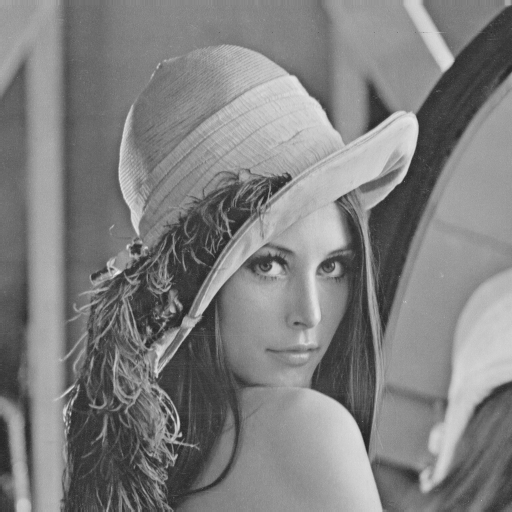

In [ ]:
cv2_imshow(image);
gray=gray_scale(image)
cv2_imshow(gray)

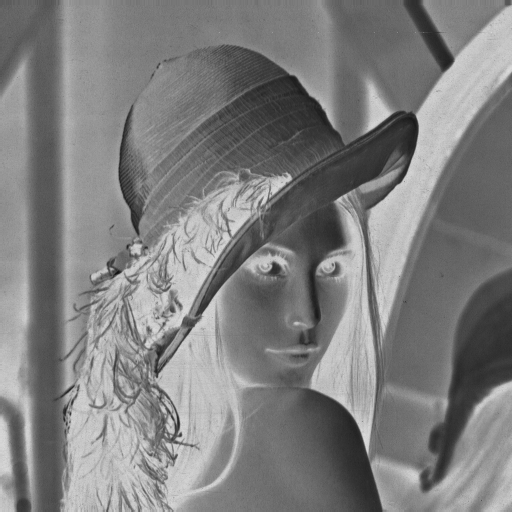

In [ ]:
h, w = gray.shape
negative = np.zeros_like(gray)
for i in range(h):
    for j in range(w):
        negative[i, j] = 255 - gray[i, j]
cv2_imshow(negative)

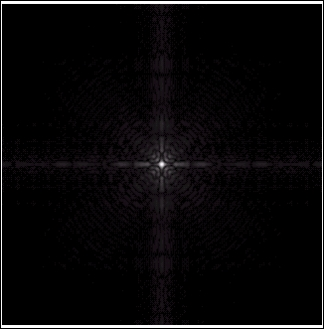

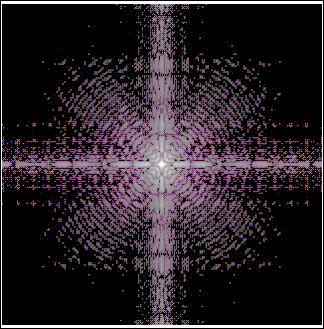

In [ ]:
oi=cv2.imread('log_transform.png')
oi=oi.astype(np.float32)
c=255/np.log(1+np.max(oi))
log_image=c*np.log(1+oi)
log_image=np.array(log_image)
cv2_imshow(oi)
cv2_imshow(log_image)

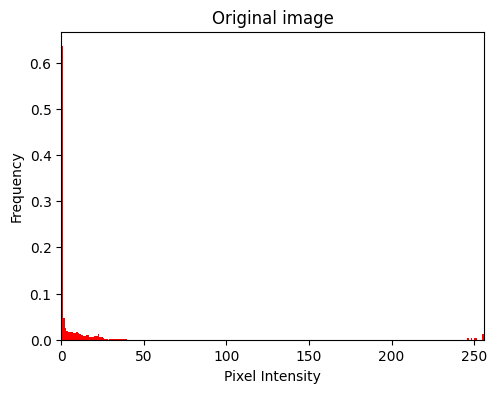

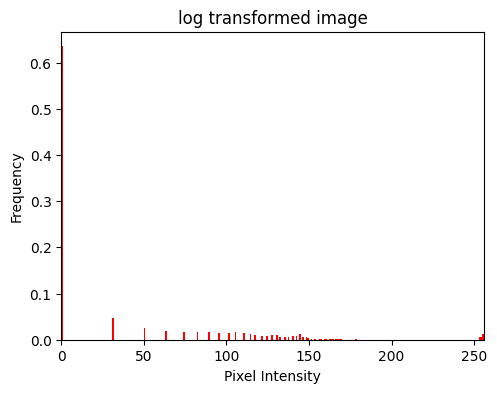

In [ ]:
plothist(oi,"Original image")
plothist(log_image,"log transformed image")

In [ ]:
def power_law_transform(image, gamma=1.5):
    image_float = image.astype(np.float32) / 255.0
    transf = np.power(image_float, gamma)
    transf = transf * 255
    transf = np.clip(transf, 0, 255)
    transf = transf.astype(np.uint8)
    return transf

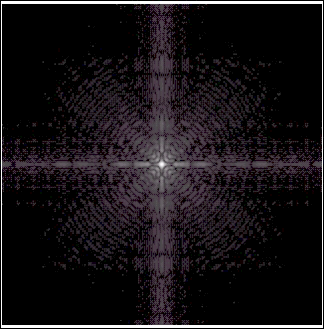

In [ ]:
law=power_law_transform(oi,0.5)
cv2_imshow(law)

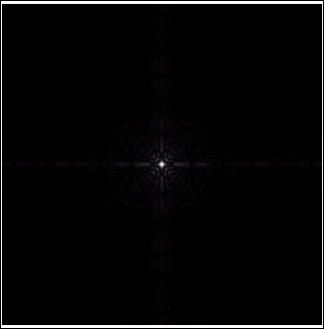

In [ ]:
law1=power_law_transform(oi)
cv2_imshow(law1)

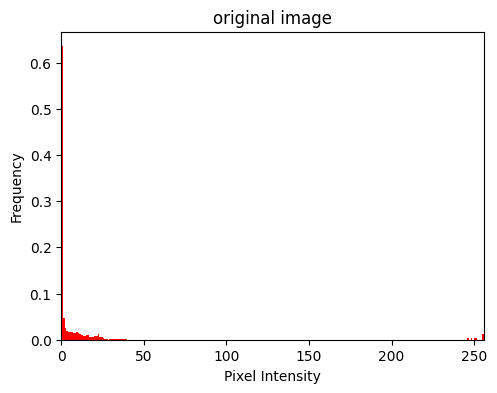

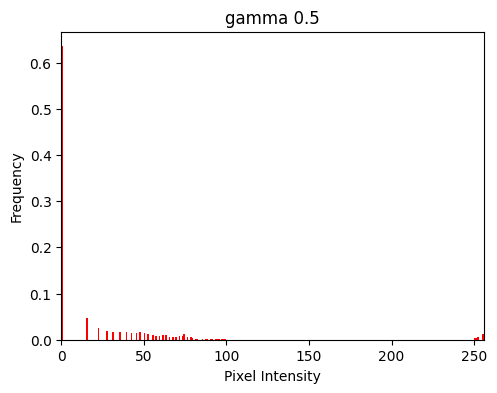

In [ ]:
plothist(oi,"original image")
plothist(law,"gamma 0.5")

In [ ]:
def contra(image) :
  min = np.min(image)
  max = np.max(image)
  image = ((image - min) / (max - min)) * 255
  return image

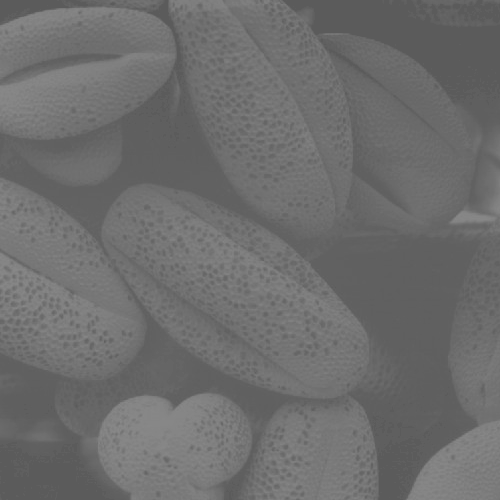

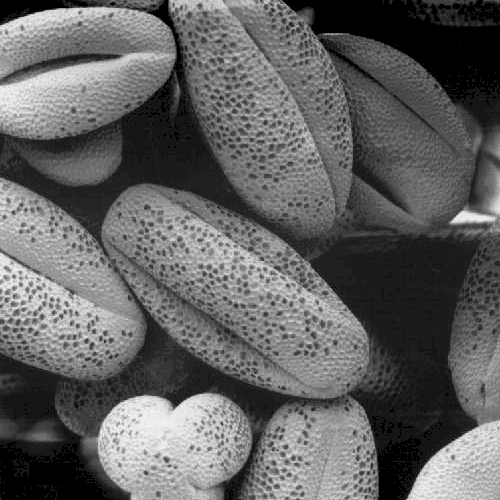

In [ ]:
oi=cv2.imread('input.tif')
contrast=contra(oi)
cv2_imshow(oi)
cv2_imshow(contrast)